In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load in your csv.gz's of results for each year extracted
yr00 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)
yr00.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [21]:
# Load in your csv.gz's of results for each year extracted
yr01 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)
yr01.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1137.0,PG-13


In [22]:
# concatenate the dataframes pages
df_years = pd.concat([yr01, yr00],
                      ignore_index=True)

In [23]:
## Save current dataframe to file.
df_years.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [24]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4443 non-null   object 
 1   adult                  4441 non-null   float64
 2   backdrop_path          1911 non-null   object 
 3   belongs_to_collection  248 non-null    object 
 4   budget                 4441 non-null   float64
 5   genres                 4441 non-null   object 
 6   homepage               230 non-null    object 
 7   id                     4441 non-null   float64
 8   original_language      4441 non-null   object 
 9   original_title         4441 non-null   object 
 10  overview               4073 non-null   object 
 11  popularity             4441 non-null   float64
 12  poster_path            3729 non-null   object 
 13  production_companies   4441 non-null   object 
 14  production_countries   4441 non-null   object 
 15  rele

In [25]:
# Create a budget and revenue filters that have values greater than 0
budget_filter = df_years['budget'] > 0
revenue_filter= df_years['revenue'] > 0
# Create a new dataframe for EDA
df = df_years.loc[budget_filter & revenue_filter, :]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 1 to 4398
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                369 non-null    object 
 1   adult                  369 non-null    float64
 2   backdrop_path          350 non-null    object 
 3   belongs_to_collection  85 non-null     object 
 4   budget                 369 non-null    float64
 5   genres                 369 non-null    object 
 6   homepage               56 non-null     object 
 7   id                     369 non-null    float64
 8   original_language      369 non-null    object 
 9   original_title         369 non-null    object 
 10  overview               368 non-null    object 
 11  popularity             369 non-null    float64
 12  poster_path            368 non-null    object 
 13  production_companies   369 non-null    object 
 14  production_countries   369 non-null    object 
 15  relea

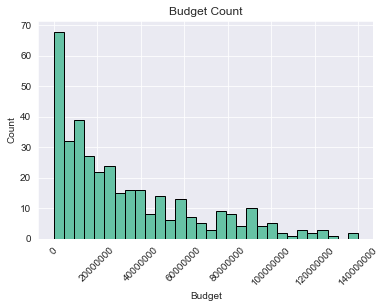

In [26]:
# Create a histogram for the count for budget for movies >0
df.loc[budget_filter, 'budget'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Budget")
plt.ylabel('Count');
plt.title('Budget Count');

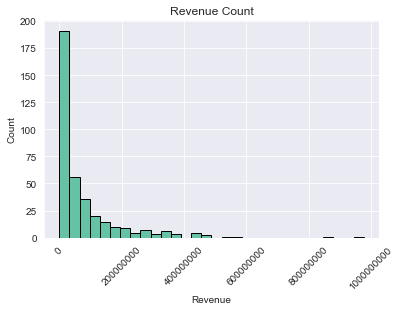

In [27]:
# Create a histogram for the count for revenue for movies >0
df.loc[revenue_filter, 'revenue'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel("Revenue")
plt.ylabel('Count')
plt.title('Revenue Count');

In [28]:
df['certification'].value_counts()

R        142
PG-13    117
PG        29
G         13
NR         6
Name: certification, dtype: int64

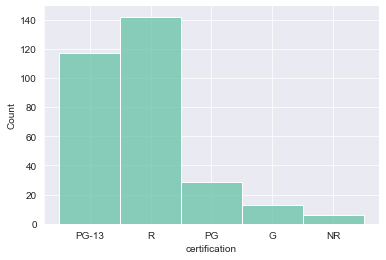

In [29]:
# Graph a histogram using seaborn
sns.histplot(data=df, x='certification', palette='Set2');
sns.despine()

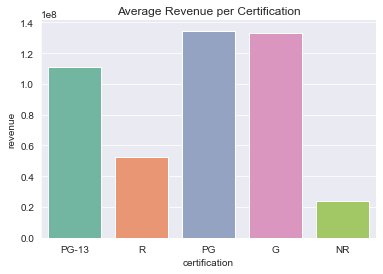

In [30]:
sns.barplot(data=df, x='certification',y='revenue', ci=None)
plt.title('Average Revenue per Certification')
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.despine()

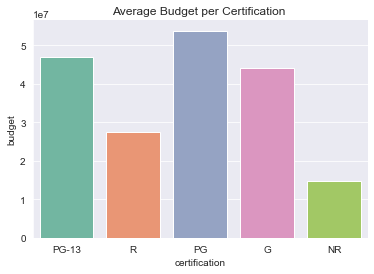

In [31]:
sns.barplot(data=df, x='certification',y='budget', ci=None)
plt.title('Average Budget per Certification ')
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.despine()

In [32]:
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)